### El nino and la Nina Effect over Austin


In [138]:
import pandas as pd
import numpy as np
import requests
import os
import csv
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as st
from scipy import stats


In [122]:
NinoNina = Path("Resources/Nino_Nina_Timeline.xlsx")
NinoNina_df = pd.read_excel(NinoNina)
NinoNina_filtered_date_df=NinoNina_df.loc[NinoNina_df['Year']>=2000]
NinoNina_filtered_date_df
Strength=[]
for x in range(len(NinoNina_filtered_date_df.index)):
    
    if NinoNina_filtered_date_df.iloc[x,1]=="Nina":
        if NinoNina_filtered_date_df.iloc[x,2]=="Weak":
                Strength.append(-1)
        elif NinoNina_filtered_date_df.iloc[x,2]=="Moderate":
                Strength.append(-2)                        
        elif NinoNina_filtered_date_df.iloc[x,2]=="Strong":
                Strength.append(-3)                           
        elif NinoNina_filtered_date_df.iloc[x,2]=="Very Strong":
                Strength.append(-4)                                                            
    elif NinoNina_filtered_date_df.iloc[x,1]=="Nino":
        if NinoNina_filtered_date_df.iloc[x,2]=="Weak":
                Strength.append(1)
        elif NinoNina_filtered_date_df.iloc[x,2]=="Moderate":
                Strength.append(2)                        
        elif NinoNina_filtered_date_df.iloc[x,2]=="Strong":
                Strength.append(3)                           
        elif NinoNina_filtered_date_df.iloc[x,2]=="Very Strong":
                Strength.append(4)
    elif NinoNina_filtered_date_df.iloc[x,1]=="None":
           Strength.append(0)
NinoNina_filtered_date_df['Intensity']=Strength
NinoNina_filtered_date_df.head()
#This final Df goal is to be able to quantify each year to a intensity value. Nino Efects are positive while nina efects are negative.

C:\Users\Leo\AppData\Local\Temp\ipykernel_31840\72508692.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NinoNina_filtered_date_df['Intensity']=Strength


,Year,Effect,Strength,Intensity
48,2000,Nina,Weak,-1
49,2001,None,NaN,0
50,2002,Nino,Moderate,2
51,2003,None,NaN,0
52,2004,Nino,Weak,1


In [148]:
#os.chdir(os.path.dirname(os.path.realpath(__file__)))
water_level_csv = Path("Resources/Lake_travis_water.xlsx")
water_travis_df = pd.read_excel(water_level_csv)

water_travis_df=water_travis_df.drop([0])

water_travis_df.rename({'Unnamed: 0':"Date", "Unnamed: 1":"Water Level ", "Unnamed: 2":"Surface Area", "Unnamed: 3":"Reservoir Storage ", "Unnamed: 4":"Conservation Storage", "Unnamed: 5":"Percent Full","Unnamed: 6":"Conservation Capacity ", "Unnamed: 7":"Dead Pool Capacity"}, axis=1, inplace=True)

water_travis_df.head()

water_travis_df['Date'] = pd.to_datetime(water_travis_df['Date'])
water_travis_df["date2"]=water_travis_df["Date"].dt.strftime('%Y-%m')

water_travis_df = water_travis_df.drop('Date', axis=1)
water_travis_df.rename({"date2":"Date"}, axis=1, inplace=True)
water_travis_df['Date'] = pd.to_datetime(water_travis_df['Date'])
start_date = '2000-01-01'
water_travis_dated_df=water_travis_df.loc[water_travis_df['Date']>=start_date]
water_travis_dated_df=water_travis_dated_df.drop_duplicates(subset=['Date'], keep='last')
water_travis_dated_df.head(10)
#Now I have per month levels or water for lake travis start from 2000


,Water Level,Surface Area,Reservoir Storage,Conservation Storage,Percent Full,Conservation Capacity,Dead Pool Capacity,Date
20969,663.65,15010,838198,816773,73.3,1113531,21425,2000-01-01
20998,664.17,15120.7,846032,824607,74.1,1113531,21425,2000-02-01
21029,663.38,14952.6,834153,812728,73,1113531,21425,2000-03-01
21059,659.92,14213.8,783726,762301,68.5,1113531,21425,2000-04-01
21090,655.9,13416,728203,706778,63.5,1113531,21425,2000-05-01
21120,651.09,12526.1,665820,644395,57.9,1113531,21425,2000-06-01
21151,644.87,11331.9,591436,570011,51.2,1113531,21425,2000-07-01
21182,643.76,11093.6,579012,557587,50.1,1113531,21425,2000-08-01
21212,641.06,10673,549636,528211,47.4,1113531,21425,2000-09-01
21243,648.43,12042.4,633147,611722,54.9,1113531,21425,2000-10-01


<Axes: xlabel='Year'>

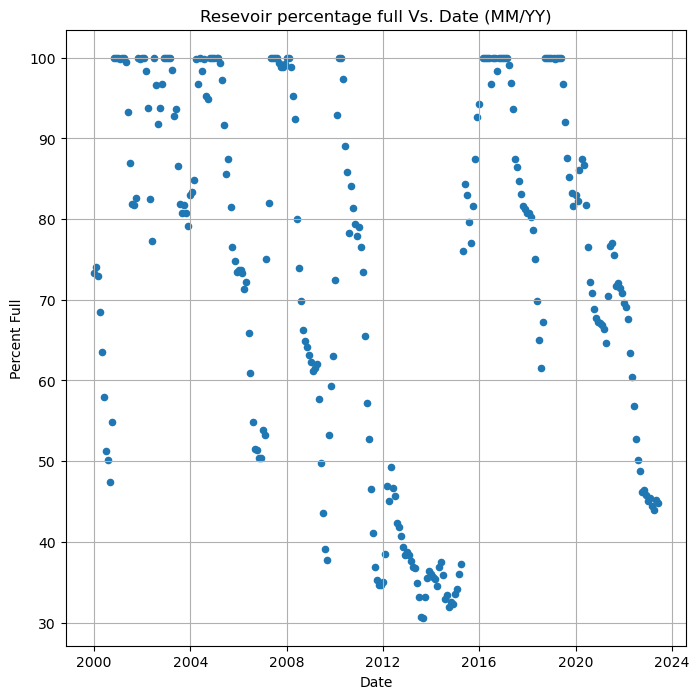

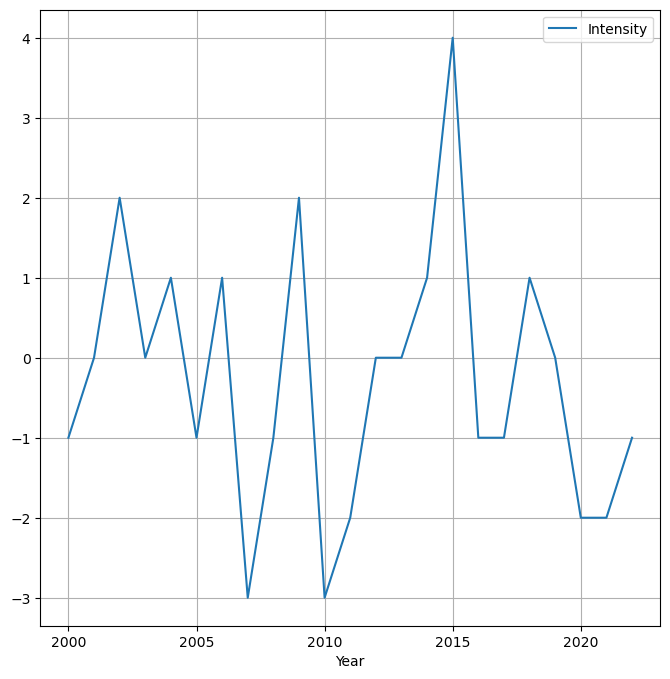

In [134]:

water_travis_dated_df.plot(kind="scatter", y="Percent Full", x="Date", grid=True, figsize=(8,8),
              title="Resevoir percentage full Vs. Date (MM/YY)")
NinoNina_filtered_date_df.plot(kind="line", y="Intensity", x="Year", grid=True, figsize=(8,8),)

In [153]:
NinoNina_filtered_date_df['Year'] = pd.to_datetime(NinoNina_filtered_date_df['Year'],format = '%Y')
NinoNina_filtered_date_df.dtypes

C:\Users\Leo\AppData\Local\Temp\ipykernel_31840\371251119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NinoNina_filtered_date_df['Year'] = pd.to_datetime(NinoNina_filtered_date_df['Year'],format = '%Y')


Year         datetime64[ns]
Effect               object
Strength             object
Intensity             int64
dtype: object

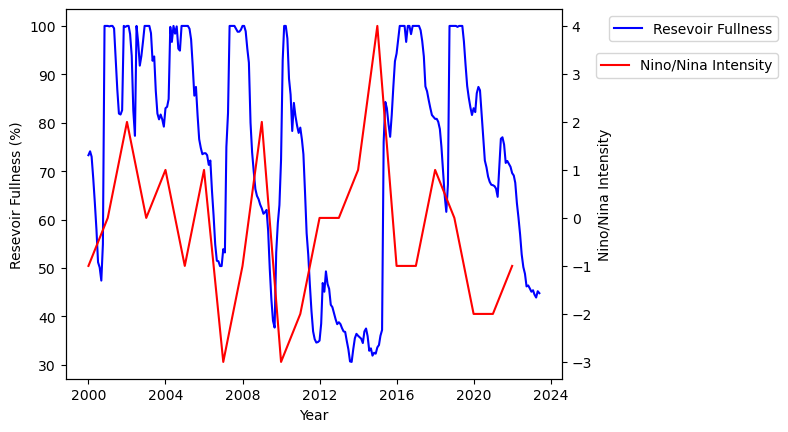

In [183]:
#plt.figure(figsize=(16, 8), dpi=150)
#water_travis_dated_df['Percent Full'].plot(label='Tesla', color='orange')
#NinoNina_filtered_date_df['Intensity'].plot(label='GM')
#plt.legend()
import matplotlib.pyplot as plt 




fig, ax1 = plt.subplots()


ax1.plot(water_travis_dated_df['Date'],water_travis_dated_df['Percent Full'], label="Resevoir Fullness",color='blue')
ax1.set_ylabel('Resevoir Fullness (%)')
ax2 = ax1.twinx()
ax2.plot(NinoNina_filtered_date_df['Year'],NinoNina_filtered_date_df['Intensity'], label="Nino/Nina Intensity",color="red")
ax2.set_ylabel('Nino/Nina Intensity')

ax1.set_xlabel('Year')
legend1 = ax1.legend(loc='upper right',bbox_to_anchor=(1.450, 1))
legend2 = ax2.legend(loc='upper right',bbox_to_anchor=(1.450, 0.9))
# Combine the legends
#plt.gca().add_artist(legend1)

#plt.legend(loc='upper right',bbox_to_anchor=(1.50, 1))
plt.show()

In [ ]:
Power_csv=Path("Resources/System_Production_Cost.csv")
Power_df=pd.read_csv(Power_csv)
Power_df.head()
Power_df=Power_df.sort_values(by=["Fiscal Year"],ascending=True)
Power_dated_df=Power_df.loc[Power_df['Fiscal Year']>=2000]
Power_dated_df.head()
#Now, I want to ajust cost Per KWh by inflation



,Fiscal Year,Electricity Usage (Kwh),Total Electricity Cost,Natural Gas Usage (Mcf),Total Natural Gas Cost,Other Energy Cost,Cost Per KWh
22,2000,"57,455,808","$2,402,778","4,601,733","$14,635,470","$20,499,280",$0.0418
21,2001,"56,522,415","$2,385,745","4,591,858","$25,351,745","$22,519,073",$0.0422
20,2002,"57,917,877","$3,169,384","4,396,375","$16,267,195","$22,435,101",$0.0547
19,2003,"59,933,038","$3,227,553","4,227,407","$17,006,112","$23,603,677",$0.0539
18,2004,"62,127,352","$3,726,099","4,943,169","$21,365,440","$28,500,498",$0.0600


In [ ]:
Inflation_csv=Path("Resources/Yearly_Inflation_Rate.xlsx")
Inflation_df=pd.read_excel(Inflation_csv)
Inflation_dated_df=Inflation_df.loc[Inflation_df['Year']>=2000]
Inflation_dated_df.head()

,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Annual Avg
87,2000,168.8,169.8,171.2,171.3,171.5,172.4,172.8,172.8,173.7,174.0,174.1,174.0,172.2
88,2001,175.1,175.8,176.2,176.9,177.7,178.0,177.5,177.5,178.3,177.7,177.4,176.7,177.1
89,2002,177.1,177.8,178.8,179.8,179.8,179.9,180.1,180.7,181.0,181.3,181.3,180.9,179.9
90,2003,181.7,183.1,184.2,183.8,183.5,183.7,183.9,184.6,185.2,185.0,184.5,184.3,184.0
91,2004,185.2,186.2,187.4,188.0,189.1,189.7,189.4,189.5,189.9,190.9,191.0,190.3,188.9


In [184]:
#ajust inflation per year for cost per KWh
Power_dated_df['Anual Avg Inflation Rate']=Inflation_dated_df['Annual Avg']
Power_dated_df.head()
#for index, row in Power_dated_df.iterrows():
inflation_ajusted=[]

for year, value in historical_data:
    inflation_rate = inflation_rates.get(year)
    if inflation_rate is not None:
        adjusted_value = value / (1 + inflation_rate)
        adjusted_data.append((year, adjusted_value))

# Adjust current value
inflation_rate_current = inflation_rates.get(current_year)
if inflation_rate_current is not None:
    adjusted_current_value = current_value / (1 + inflation_rate_current)
    adjusted_data.append((current_year, adjusted_current_value))

# Create DataFrame from adjusted data
df_adjusted = pd.DataFrame(adjusted_data, columns=['Year', 'Adjusted Value'])



C:\Users\Leo\AppData\Local\Temp\ipykernel_31840\2191179122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Power_dated_df['Anual Avg Inflation Rate']=Inflation_dated_df['Annual Avg']


,Fiscal Year,Electricity Usage (Kwh),Total Electricity Cost,Natural Gas Usage (Mcf),Total Natural Gas Cost,Other Energy Cost,Cost Per KWh,Anual Avg Inflation Rate
22,2000,"57,455,808","$2,402,778","4,601,733","$14,635,470","$20,499,280",$0.0418,NaN
21,2001,"56,522,415","$2,385,745","4,591,858","$25,351,745","$22,519,073",$0.0422,NaN
20,2002,"57,917,877","$3,169,384","4,396,375","$16,267,195","$22,435,101",$0.0547,NaN
19,2003,"59,933,038","$3,227,553","4,227,407","$17,006,112","$23,603,677",$0.0539,NaN
18,2004,"62,127,352","$3,726,099","4,943,169","$21,365,440","$28,500,498",$0.0600,NaN
